<a href="https://colab.research.google.com/github/Dinuki-Lejinarathna/2054866_DSPL_Week7/blob/main/Model_training_Tut7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

# Load diabetes dataset
diabetes_df = pd.read_csv('/content/diabetes.csv')

In [2]:
print(diabetes_df.head())  # Task 1

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
# Task 2: Median blood pressure for diabetic patients
median_bp = diabetes_df[diabetes_df['Outcome'] == 1]['BloodPressure'].median()
print("Median Blood Pressure of Diabetic Patients:", median_bp)

Median Blood Pressure of Diabetic Patients: 74.0


In [4]:
# Task 3: Check dataset balance
print(diabetes_df['Outcome'].value_counts(normalize=True))

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


In [5]:
# Task 4: Prepare features (X) and target (Y)
X = diabetes_df.drop(columns=['Outcome'])
y = diabetes_df['Outcome']

In [6]:
# Task 5 & 6: Train-test split (3:1) with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)


In [7]:
# Task 7: Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)

Decision Tree Accuracy: 0.7447916666666666


In [8]:
# Task 8: Detect overfitting
print("Train Accuracy:", dt.score(X_train, y_train))
print("Test Accuracy:", dt.score(X_test, y_test))

Train Accuracy: 1.0
Test Accuracy: 0.7447916666666666


In [9]:
# Task 9: Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       125
           1       0.66      0.55      0.60        67

    accuracy                           0.74       192
   macro avg       0.72      0.70      0.71       192
weighted avg       0.74      0.74      0.74       192



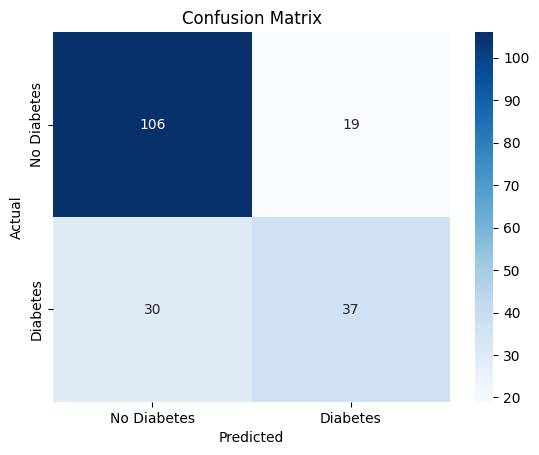

In [10]:
# Task 10: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

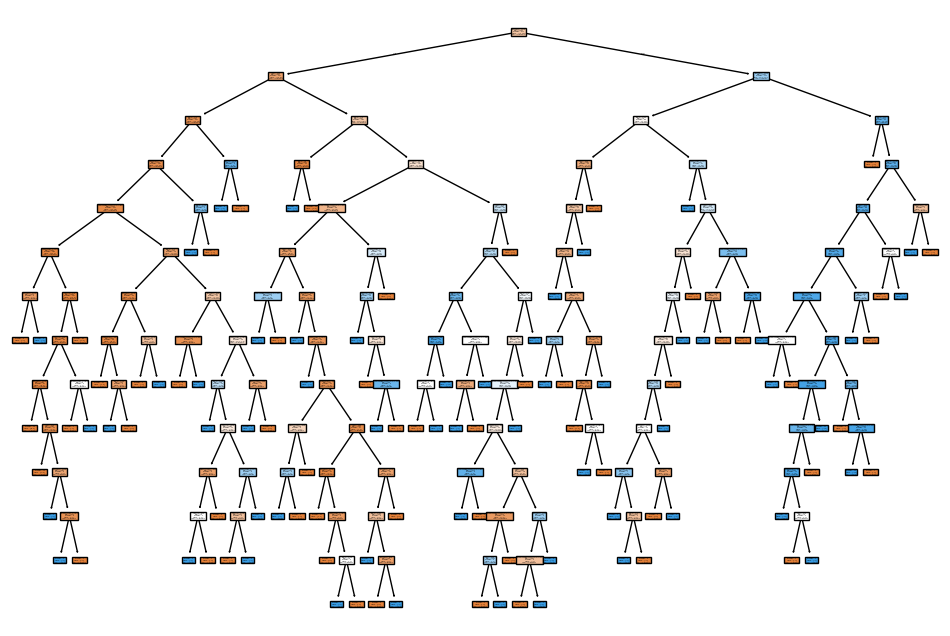

In [11]:
# Task 11: Visualizing Decision Tree
plt.figure(figsize=(12,8))
plot_tree(dt, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()


In [12]:
# Task 12: Feature importance ranking
feature_importance = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)

Feature Importance:
 Glucose                     0.339264
BMI                         0.168434
DiabetesPedigreeFunction    0.117931
Age                         0.115767
BloodPressure               0.097375
Insulin                     0.078565
Pregnancies                 0.058974
SkinThickness               0.023690
dtype: float64


In [13]:
# Task 13: Train KNeighborsClassifier and compare
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.91      0.81       125
           1       0.70      0.39      0.50        67

    accuracy                           0.73       192
   macro avg       0.72      0.65      0.66       192
weighted avg       0.72      0.73      0.70       192



In [15]:
# Load pollution dataset for clustering
pm25_df = pd.read_csv('/content/pm25_2016_2020.csv')
print(pm25_df.head())


   Unnamed: 0 date_local  latitude_x  longitude_x  elevation  tavg  tmin  \
0           0  6/15/2017   39.024265   -95.711275      280.0   NaN   NaN   
1           1  6/18/2017   39.024265   -95.711275      280.0   NaN   NaN   
2           2  6/21/2017   39.024265   -95.711275      280.0   NaN   NaN   
3           3  6/24/2017   39.024265   -95.711275      280.0   NaN   NaN   
4           4  6/30/2017   39.024265   -95.711275      280.0   NaN   NaN   

   tmax  prcp  snow  wdir  wspd  wpgt  pres  tsun  arithmetic_mean_a  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN                8.6   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN                3.4   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN                6.6   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN                5.1   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN                5.0   

   arithmetic_mean_b  
0                9.2  
1                3.9  
2                6.7  
3                5

In [24]:
# Task 14: Identify two geographic columns (e.g., Latitude & Longitude)
geo_cols = ['latitude_x', 'longitude_x']  # Modify based on dataset structure


In [26]:
# Task 15: Extract and store in new dataframe X
X_geo = pm25_df[geo_cols]
X_geo.head()

,latitude_x,longitude_x
0,39.024265,-95.711275
1,39.024265,-95.711275
2,39.024265,-95.711275
3,39.024265,-95.711275
4,39.024265,-95.711275


In [27]:
# Task 16 & 17: Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_geo)
X_geo['Cluster'] = kmeans.labels_

<ipython-input-27-9bc301980512>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_geo['Cluster'] = kmeans.labels_


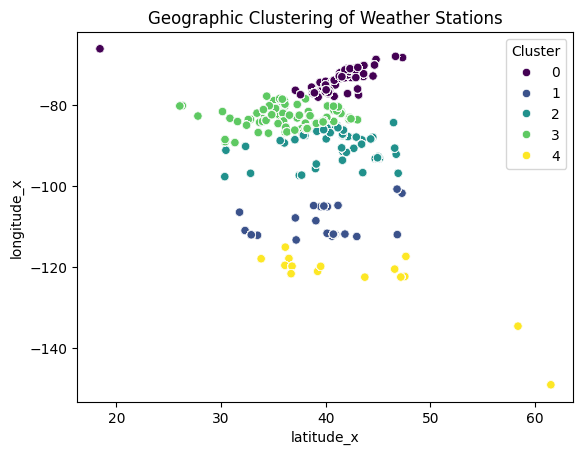

In [29]:
# Task 18: Visualizing clusters
sns.scatterplot(x=X_geo['latitude_x'], y=X_geo['longitude_x'], hue=X_geo['Cluster'], palette='viridis')
plt.xlabel('latitude_x')
plt.ylabel('longitude_x')
plt.title('Geographic Clustering of Weather Stations')
plt.show()